# Boston House Price Dataset - Machine Learning

This is a short demo on how machine learning can be used to predict house prices from the Boston house price dataset.

## 1. Look at the data
The first step to any machine learning is to look at the data, and get an understanding for what features you can derive.

Features are characteristics of the data you extract from the data (or more rarely, you can use the raw data as a feature).

Generally the most difficult part of machine learning is the data, so it's important to get a good understanding of what you have and how you can use it.

In [1]:
# Using the boston house price dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()

ModuleNotFoundError: No module named 'sklearn'

In [2]:
# Not necessary to put it into a pandas dataframe, but it helps for analysis
import pandas as pd

# Load the characteristics of each house
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [3]:
# Show the first 5, we're just trying to get a feel for the data
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


So by the looks of it, we have 13 columns here, and I'll list below what each one corresponds to:

* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

In addition to this, the boston_dataset also contains the corresponding house prices for each row above.

In [4]:
# Load the prices of each house
prices = pd.DataFrame(boston_dataset.target, columns=['PRICE'])

In [5]:
# Again, just show the first 5
prices.head()

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Not too surpising here, the price is just a number (likely in thousands of $).

## 2. Go a bit deeper with the data

Now we know what we're dealing with, it's time to start analysing the data to see if any of the columns might be indicative of house price.

For now we're going to consider the raw data as possible features, but keep in mind these could be converted into more useful features.

It's worth mentioning machine learning models only deal with numbers, so text would have to be converted into some numerical format to be used (not in the scope of this demo).

For the boston dataset, it'd be useful to know which columns have a positive or negative correlation with the house price.

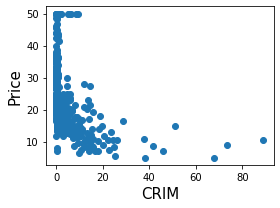

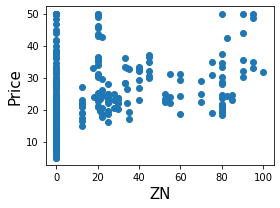

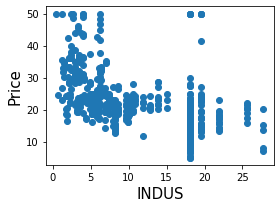

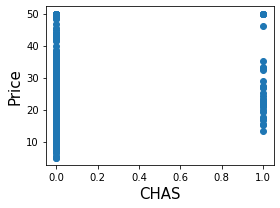

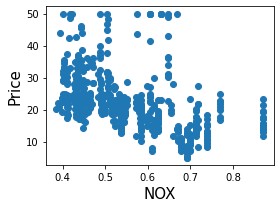

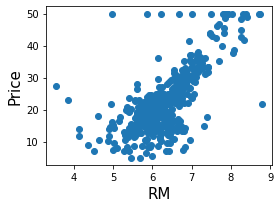

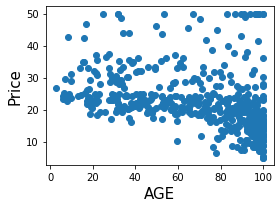

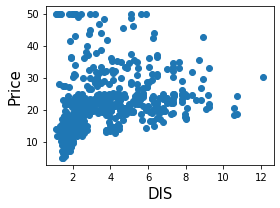

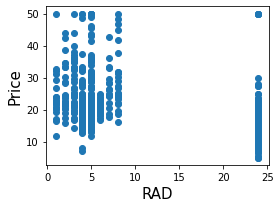

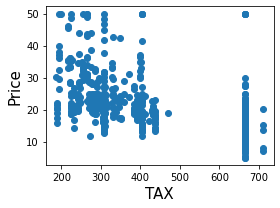

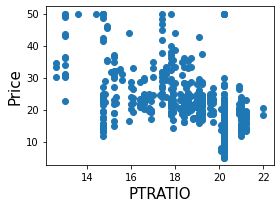

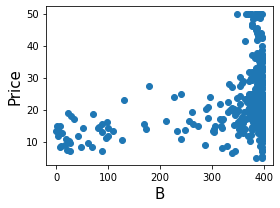

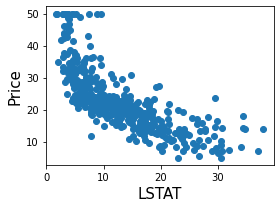

In [9]:
import matplotlib.pyplot as plt
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

These graphs are a scatter plot for each column against the house price (e.g. the first is house price against crime rate)

From these graphs you can begin to see which columns are correlated with the house price, the majority of which aren't perfect.

The best positive correlation appears to be number of rooms, suggesting that it's a strong indication of house prices and would definitely be a useful feature to include.

There's more complicated ways to do this but don't feel like it has to be in Python, it could be excel or anything else that gives a better understanding of the data.

## 3. Data processing

This is a step which I won't go into much detail here, but might be where you choose to process the data and produce the final features to be used in the machine learning model.

For example, you might choose to drop the columns that have little affect on house price, to make it easier for the model to learn. A popular phrase here is 'garbage in, garbage out' meaning if you give a model bad data, you'll get bad predictions.

You might also want to fill in any missing values, or normalise the data between 0 and 1 (some models can be influenced by the scaling of features, namely SVMs).

__This is generally one of the hardest parts of machine learning, so don't be afraid to trial and error this part by training and testing the model as shown below to figure out the best features__

For this case I won't change any of the features, but you can try this yourself if you like

## 4. Create the training and testing datasets

This might sound obvious, but we don't want to test our machine learning model on data it has already seen before. Since we'd never know how accurate our model is if we test it on unknown house prices, we often split up our own data into a training and testing set, so we can compare the predicted house prices and the true house prices.

In [10]:
# I'm using the original boston_dataset variable here, so make sure to change it if you're playing around with new features.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_dataset.data, boston_dataset.target)

In [11]:
# Let's have a look at how the data has been split
print(X_train.shape[0], X_test.shape[0])

379 127


Nice, it looks like we'll be training our model on 379 rows and testing it on 127. A common split is 80:20 for training:testing, but again you can play around with this ratio yourself.

## 5. Training the model

Woooo time for the fun bit, deciding on a model to use and training it!

There are quite a few models that you can probably just swap in and out to compare performance directly, but some may the features to be in a specific format to be used. I'll list a few here to try if you want later: 

* SVM Regressor
* Linear Regression
* Gradient Boosting Regressor

I've chosen Random Forest for this example, it's a personal favourite and does well with most feature sets. You don't need to understand the theory behdind it to use it, but it helps.

In [12]:
# Load and train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Wasn't that easy! It's trained and ready to go!

## 6. Testing the model

Time to test, again there's many ways of doing this and several metrics you can consider, so feel free to play around with this yourself.

Let's just look at a basic example of how to make a prediction, and compare it to the actual value.

In [13]:
# Show the predicted value for the first test data point
model.predict([X_test[0]])

array([19.751])

In [14]:
# And let's look at the actual value for the first test data point
y_test[0]

19.4

Pretty close! We can see our model was only 0.041 off of the actual value.

But this might have been a fluke, so let's show a graph of all the test predictions and actual values.

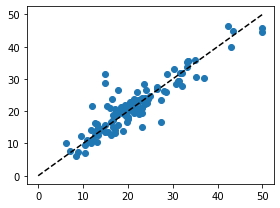

In [15]:
predicted = model.predict(X_test)
expected = y_test

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.tight_layout()

Wowzers! Looks like this model is very good at predicting house prices

Well done for making it to the end, feel free to have a play around with it youself!